In [1]:
import numpy as np
import PIL.Image as Im
import matplotlib.pyplot as plt
import scipy.io

# Preparations
## Question 1
### On line 7, we use the inverse of the matrix T, why?
We are looking for $x_f$ and $y_f$, T is moved to lhs

## Question 5
### Write an equation, similar to (1), for the affine transformation equation for rotation an angle θ around the point $(x_t, y_t)$.
\begin{equation*}
\begin{vmatrix}
x_g \\ y_g 
\end{vmatrix} = \begin{vmatrix} x_t \\ y_t \end{vmatrix} +
\begin{vmatrix}
\cos \theta & \sin \theta \\ -\sin \theta & \cos \theta
\end{vmatrix} \begin{vmatrix}
x_f - x_t \\ y_f - y_t
\end{vmatrix}
\end{equation*}

## Question 6
### Write an alternative equation to (2) including the MATLAB command round instead of the sum and the rectangular function Π.
$$ round\left( f(x_f,y_f) \right) $$

## Question 9
### Why do we add 1 in the expression  $log_{10}\left(1 + \left(F(u, v)\right)\right)$?
Because $\log (0) = -\infty$

## Question 13
### Compare the error energy in the spatial and the Fourier domain. Which theorem relates these two measures and do your own measurements agree with the theorem?
Donut know

## Question 17
### Write an alternative equation to equation (3) including the MATLAB command floor and simple multiplications and additions instead of the sum and the two-dimensional triangular function Λ.
What does the question mean?

# BONG
## Question 2
Top left

## Question 3
Add $\left( \begin{matrix} cols/2 \times T_{1,2} \\ rows/2 \times T_{2,1} \end{matrix}\right)$

## Question 4
Cry some matlab

(122, 122)


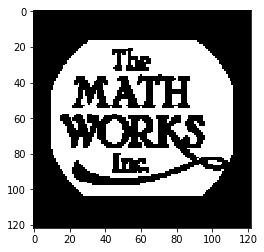

In [33]:
#im = np.array(Im.open('baboon.tif'),dtype=np.float)
im = np.array(scipy.io.loadmat('math_logo.mat')['math_logo'],dtype=np.float)
T = np.array(((1, -1/3), (0, 1)))
plt.imshow(im, cmap='gray')

In [3]:
def shearIm(im, t):
    rows, cols = im.shape
    shear_im = np.zeros_like(im)
    for xg in range(rows):
        for yg in range(cols):
            xyff = np.dot(np.linalg.inv(t), np.array(((xg),(yg)))) + np.array((cols/2 * t[0,1], rows/2 * t[1,0]))
            xff = xyff[0]
            yff = xyff[1]
            if xff <= cols-1 and yff <= rows-1 and xff >=0 and yff>=0:
                xf = int(round(xff))
                yf = int(round(yff))
                shear_im[yg, xg] = im[yf,xf]
    return shear_im

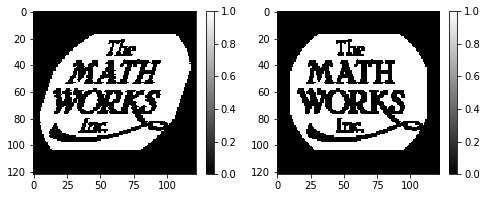

In [4]:
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.imshow(shearIm(im, T), cmap='gray')
plt.colorbar()

plt.subplot(122)
plt.imshow(im, cmap='gray')
plt.colorbar()

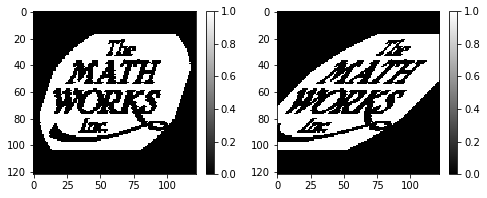

In [5]:
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.imshow(shearIm(im, T), cmap='gray')
plt.colorbar()

plt.subplot(122)
T2 =  np.array(((1, -1), (0, 1)))
plt.imshow(shearIm(im, T2), cmap='gray')
plt.colorbar()

In [6]:
from enum import Enum
class Interp(Enum):
    Nearest = 0
    Bilinear = 1
    Bicubic4 = 2
    Bicubic16 = 3

In [57]:
import math
def h4(x):
    return 2 * abs(x)**3 - 3*x**2 + 1 if abs(x) <= 1 else 0

def h(x):
    if abs(x) <= 1:
        return 1.5*abs(x)**3 - 2.5*(x**2) + 1
    elif abs(x) <= 2:
        return -0.5*abs(x)**3 + 2.5*(x**2) - 4*x+2
    else:
        return 0

def rotateIm(im, theta, intpol):
    rows, cols = im.shape
    rotate_im = np.zeros_like(im)
    t = np.array(((math.cos(theta), -math.sin(theta)), (math.sin(theta), math.cos(theta))))
    for xg in range(rows):
        for yg in range(cols):
            xyff = np.dot(np.linalg.inv(t), np.array(((xg - cols/2),(yg - rows/2))))
            xyff = xyff + np.array(((cols/2),(rows/2)))
            xff = xyff[0]
            yff = xyff[1]
            if xff <= cols-1 and yff <= rows-1 and xff >=0 and yff>=0:
                if intpol == Interp.Nearest :
                    xf = int(round(xff))
                    yf = int(round(yff))
                    rotate_im[yg, xg] = im[yf,xf]
                elif intpol == Interp.Bilinear:
                    for x, y in [(0, 0), (0, 1), (1, 0), (1, 1)]:
                        xf = math.floor(xff + x)
                        yf = math.floor(yff + y)
                        if xf >= cols or yf >= rows:
                            continue
                        rotate_im[yg, xg] += im[yf, xf] * (1 - abs(yff-yf)) * (1 - abs(xff-xf)) 
                elif intpol == Interp.Bicubic4:
                    for x, y in [(0, 0), (0, 1), (1, 0), (1, 1)]:
                        xf = math.floor(xff + x)
                        yf = math.floor(yff + y)
                        if xf >= cols or yf >= rows:
                            continue
                        rotate_im[yg, xg] += im[yf, xf] * h4(yff-yf) * h4(xff-xf)
                elif intpol == Interp.Bicubic16:
                    """for x in range(-1,3):
                        for y in range(-1,3):
                            xf = math.floor(xff + x)
                            yf = math.floor(yff + y)
                            if xf >= cols or yf >= rows or xf < 0 or yf < 0:
                                continue
                            rotate_im[yg, xg] += im[yf, xf] * h16(yff-yf) * h16(xff-xf)
                    """
                    if (xff<cols-2 and yff<rows-2 and xff>1 and yff>1):
                        yf=math.floor(yff)
                        xf=math.floor(xff)

                        dxf=xff-xf
                        dxff=dxf+1
                        dxc=1-dxf
                        dxcc=1+dxc

                        dyf=yff-yf
                        dyff=dyf+1                    
                        dyc=1-dyf                    
                        dycc=dyc+1

                        firstRow =  h(dxff)*h(dyff)*im[yf-1,xf-1]+\
                        h(dxff)*h(dyf)* im[yf,xf-1]+\
                        h(dxff)*h(dyc)* im[yf+1,xf-1]+\
                        h(dxff)*h(dycc)*im[yf+2,xf-1]

                        secondRow = h(dxf)*h(dyff)* im[yf-1,xf]+\
                        h(dxf)*h(dyf)*  im[yf,xf]+\
                        h(dxf)*h(dyc)*  im[yf+1,xf]+\
                        h(dxf)*h(dycc)* im[yf+2,xf]

                        thirdRow =  h(dxc)*h(dyff)* im[yf-1,xf+1]+\
                        h(dxc)*h(dyf)*  im[yf,xf+1]+\
                        h(dxc)*h(dyc)*  im[yf+1,xf+1]+\
                        h(dxc)*h(dycc)* im[yf+2,xf+1]

                        fourthRow = h(dxcc)*h(dyff)*im[yf-1,xf+2]+\
                        h(dxcc)*h(dyf)* im[yf,xf+2]+\
                        h(dxcc)*h(dyc)* im[yf+1,xf+2]+\
                        h(dxcc)*h(dycc)*im[yf+2,xf+2]

                        rotate_im[yg, xg]= firstRow+secondRow+thirdRow+fourthRow

                    elif (xff<cols and yff<rows and xff>1 and yff>1):
                        for x, y in [(0, 0), (0, 1), (1, 0), (1, 1)]:
                            xf = math.floor(xff + x)
                            yf = math.floor(yff + y)
                            if xf >= cols or yf >= rows:
                                continue
                            rotate_im[yg, xg] += im[yf, xf] * h4(yff-yf) * h4(xff-xf)
    
    return rotate_im


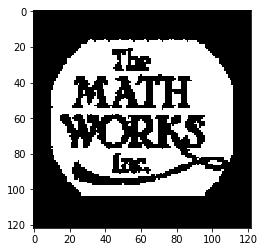

In [8]:
rot_im = rotateIm(im, math.pi/6, Interp.Nearest)
n_im = rotateIm(rot_im, -math.pi/6, Interp.Nearest)

plt.imshow(n_im, cmap='gray')

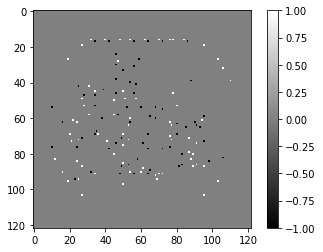

In [9]:
dif_im = n_im - im
plt.imshow(dif_im, cmap='gray')
plt.colorbar()

## Question 7
###  How does the difference-image look like? How large and where are the errors?
See above. The errors seem small, and they appear at edges.

In [10]:
np.sum((n_im-im)*(n_im-im))

141.0

## Question 8
### What is the error energy in the spatial domain when using nearest neighbour interpolation?
141

In [11]:
def short_fft(im):
    return np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(im)))
    
f_im = short_fft(im)
f_nim = short_fft(n_im)
f_rotim = short_fft(rot_im)

Text(0.5,1,'Forward/Backward Image')

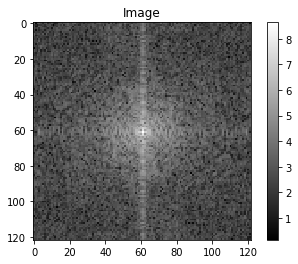

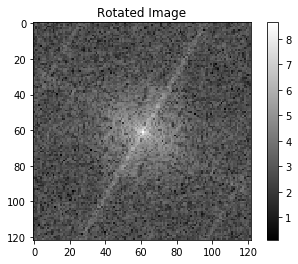

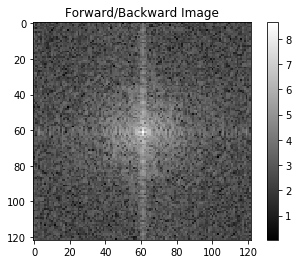

In [12]:
plt.figure()
plt.imshow(np.log(1+abs(f_im)),cmap='gray')
plt.colorbar()
plt.title("Image")

plt.figure()
plt.imshow(np.log(1+abs(f_rotim)),cmap='gray')
plt.colorbar()
plt.title("Rotated Image")

plt.figure()
plt.imshow(np.log(1+abs(f_nim)),cmap='gray')
plt.colorbar()
plt.title("Forward/Backward Image")


## Question 10
###  Do the Fouriertransform of the original and the forward and back-rotated image look similar?
Yes, the normal and forward/backward rotated looks identical to our eyes, the forward rotated looks like it's rotated

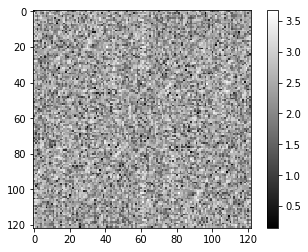

In [13]:
plt.imshow(np.log(1 + abs(short_fft(dif_im))), cmap='gray')
plt.colorbar()

## Question 11
### Also, look at the Fourier transform of the difference image (nIm-Im). How are the errors distributed in relation to the frequences?
There are errors in all frequencies.

In [14]:
N = f_im.shape
energy = np.sum((f_im-f_nim)*np.conj(f_im-f_nim))/(N[0] * N[1])
print(energy)

(141+0j)


## Question 12
### What is the error energy in the Fourier domain when using nearest neighbour interpolation?
141, same as in spatial domain.

## Question 14 DONE
###  Do your own measurements agree with the theorem?
Yes, see 8 and 12


In [15]:
def rel_error(f_im1, f_im2):
    return (np.abs(f_im1-f_im2)/np.abs(f_im1))

## Question 15
### Why can this be a better measure?
Low frequencies have high amplitude while hight frequencies have a low amplitude, in most cases.

Text(0.5,1,'nim - im')

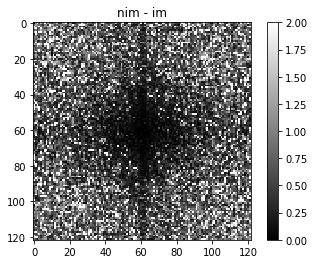

In [16]:
plt.figure()
plt.imshow(rel_error(f_nim, f_im), cmap='gray', vmin=0, vmax=2)
plt.colorbar()
plt.title('nim - im')

## Question 16
### How are the errors distributed in relation to the frequences?
As can be seen above, errors are more prominent in higher frequencies

## Question 17
### Bilinear interpolation
```python
for x, y in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    xf = math.floor(xff + x)
    yf = math.floor(yff + y)
    if xf >= 128 or yf >= 128:
        continue
    rotate_im[yg, xg] += im[yf, xf] * (1 - abs(ff-yf)) * (1 - abs(xff-xf)) 

```

(122, 122)


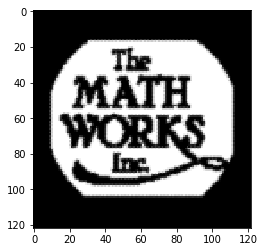

In [32]:
rot_im = rotateIm(im, math.pi/6, Interp.Bilinear)
n_im = rotateIm(rot_im, -math.pi/6, Interp.Bilinear)

plt.imshow(n_im, cmap='gray')

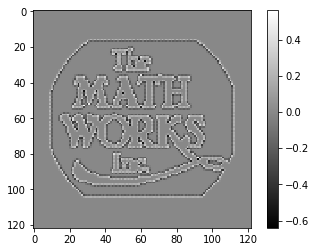

In [18]:
dif_im = n_im - im
plt.imshow(dif_im, cmap='gray')
plt.colorbar()

## Question 18
### To check how the interpolation in the rotation affects the image, rotate and back-rotate the image as you did in section 3.1b. How does the difference-image look like? How large and where are the errors?
Errors are only present on edge of the different shapes

In [19]:
np.sum((dif_im)*(dif_im))

131.09090334147064

## Question 19
### What is the error energy in the spatial domain when using bilinear interpolation? Compare it with the result for nearest neighbour interpolation.
The error energy is lower than before.

Text(0.5,1,'Rotated Image')

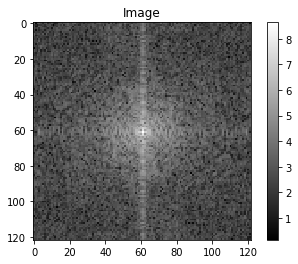

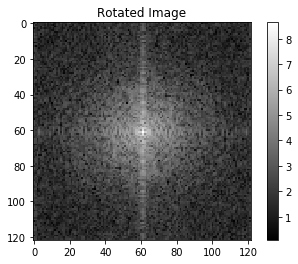

In [20]:
f_im = short_fft(im)
f_nim = short_fft(n_im)

plt.figure()
plt.imshow(np.log(1+abs(f_im)),cmap='gray')
plt.colorbar()
plt.title("Image")

plt.figure()
plt.imshow(np.log(1+abs(f_nim)),cmap='gray')
plt.colorbar()
plt.title("Rotated Image")

## Question 20
### Why are the high frequencies more attenuated in the forward and back-rotated image?
The edges are more smoothed so there are not as many high frequencies

## Question 21
### Why was this not the case for nearest neighbour interpolation?
No smoothing, only moving of pixels

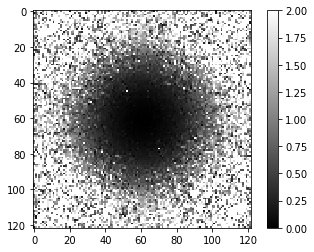

In [21]:
plt.imshow(rel_error(f_nim, f_im),cmap='gray',vmin=0,vmax=2)
plt.colorbar()

## Question 22
### How are the errors distributed in relation to the frequences?
There are bigger differences in the higher frequencies and smaller differences in the lower frequencies

## Question 23
### Write an alternative equation to equation (4) including h( ) and simple multiplications and additions.
```python
xf = math.floor(xff + x)
yf = math.floor(yff + y)
if xf >= 128 or yf >= 128:
    continue
rotate_im[yg, xg] += im[yf, xf] * h4(yff-yf) * h4(xff-xf)
```

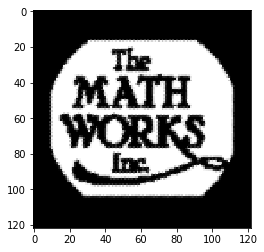

In [22]:
rot_im = rotateIm(im, math.pi/6, Interp.Bicubic4)
n_im = rotateIm(rot_im, -math.pi/6, Interp.Bicubic4)

plt.imshow(n_im, cmap='gray')

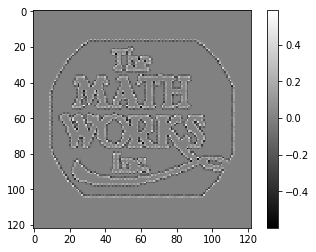

In [23]:
dif_im = n_im - im
plt.imshow(dif_im, cmap='gray')
plt.colorbar()

## Question 24
### How does the difference-image look like? How large and where are the errors?
Looks similar to bilinear, the errors are still att the edges

In [24]:
np.sum((dif_im)*(dif_im))

97.28266708737698

## Question 25
### What is the error energy in the spatial domain when using bicubic4 interpolation? Compare it with the result for bilinear and nearest neighbour interpolation.

It's better

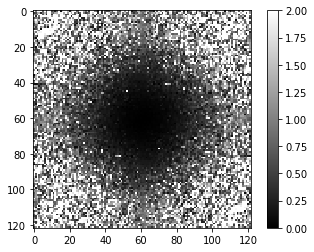

In [25]:
f_im = short_fft(im)
f_nim = short_fft(n_im)

plt.imshow(rel_error(f_nim, f_im),cmap='gray',vmin=0,vmax=2)
plt.colorbar()

## Question 26
### Compare it with the previous one when you used nearest neighbor interpolation and bilinear interpolation. How are the errors distributed in relation to the frequences?
There are less high values (less white in image), otherwise it's very similar to bilinear

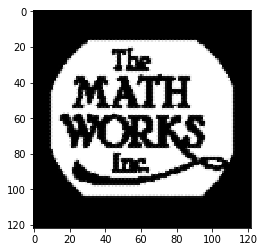

In [60]:
rot_im = rotateIm(im, math.pi/6, Interp.Bicubic16)
n_im = rotateIm(rot_im, -math.pi/6, Interp.Bicubic16)

plt.imshow(n_im, cmap='gray', vmin=0, vmax=1)

## Question 27
### Why do you get values below 0 and values above 1?
Because h(x) can give those values

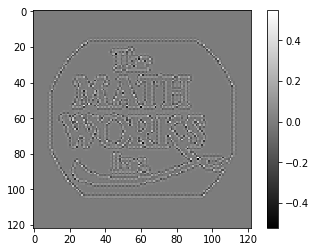

In [61]:
dif_im = n_im - im
plt.imshow(dif_im, cmap='gray')
plt.colorbar()

## Question 28
### How does the difference-image look like? How large and where are the errors?
Even less errors

In [62]:
np.sum((dif_im)*(dif_im))

53.67892431023448

## Question 29
### Compare thing
Wow it's smaller

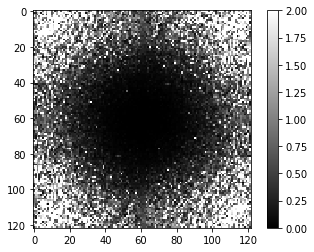

In [63]:
f_im = short_fft(im)
f_nim = short_fft(n_im)

plt.imshow(rel_error(f_nim, f_im),cmap='gray',vmin=0,vmax=2)
plt.colorbar()

## Question 30
### Compare
It's better, there is more black

In [64]:
def rotate_several(im, interp, times):
    rot_im = rotateIm(im, math.pi/6.1, interp)
    for i in range(times-1):
        rot_im = rotateIm(rot_im, math.pi/6.1, interp)
        
    return rot_im

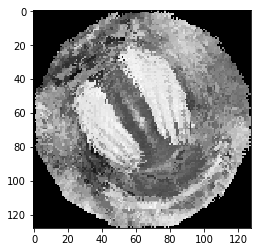

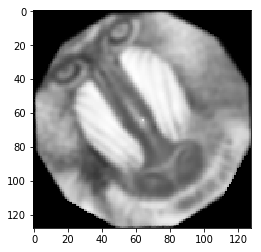

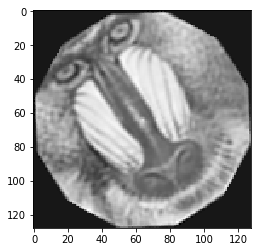

In [69]:
im = np.array(Im.open('baboon.tif'),dtype=np.float)
plt.figure()
plt.imshow(rotate_several(im, Interp.Nearest, 11), cmap='gray')
plt.figure()
plt.imshow(rotate_several(im, Interp.Bilinear, 11), cmap='gray')
plt.figure()
plt.imshow(rotate_several(im, Interp.Bicubic16, 11), cmap='gray')

## Question 31
### Right?
Yes

## Question 32
### Execute the script and check the error energy in the spatial domain. Is it equal to what you got before for nearest neighbor interpolation in section 3.1?
Nope, but it is close. (134 vs 141)

## Question 33
### How can you change the script so that it performs bilinear interpolation instead?  Is it equal to what you got before for bilinear interpolation in section 3.2?
Change the interpolation function to bilinear.
It is not equal, (129 vs 131)

## Question 34
### How can you change the script so that it performs bicubic16 interpolation instead? Do so and then check the error energy in the spatial domain. Is it equal to what you got before for bicubic16 interpolation in section 3.4?
Change the interpolation function to bilinear.
It is not equal, (52 vs 54)